### Notebook to genereate plots of binned 2D variables.

James Ruppert  
jruppert@ou.edu  
2/22/24

In [12]:
# NOTE: Using copied tracking from CTL for NCRF tests

import numpy as np
from matplotlib import rc
from matplotlib import colors
import matplotlib.pyplot as plt
from read_functions import *
import pickle

#### Main settings

In [24]:
storm = 'haiyan'
# storm = 'maria'

# main = "/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/wrfenkf/"
figdir = "/home/jamesrup/figures/tc/ens/"+storm+'/'
save_dir = "/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/jruppert/tc_postproc/"+storm+"/binned_2d_sav/"

# Time selection
# hr_tag = str(np.char.zfill(str(nt), 2))

# Tests to read and compare
# tests = ['crfon','ncrf']
# if storm == 'haiyan':
#     tests = ['ctl','ncrf36h']
# elif storm == 'maria':
#     # tests = ['ctl','ncrf36h']
#     tests = ['ctl','ncrf48h']
tests = ['ctl']
ktest=0

save_dir+=tests[ktest]+'/'

pclass_names=["Non-raining", "DeepC", "Congest", "Shallow", "Strat", "Anvil"]

In [25]:
# Bin variable settings

def binvar_settings(ivar_select):

    nbins=30

    # PW
    if ivar_select == 'pw':
        fmin=35;fmax=80 # mm
        # step=1
        bins=np.linspace(fmin,fmax,num=nbins)
        xlabel='Column Water Vapor [mm]'
        log_x='linear'
    # Column saturation fraction
    elif ivar_select == 'sf':
        fmin=30;fmax=102 # %
        # step=2
        bins=np.linspace(fmin,fmax,num=nbins)
        xlabel='Saturation Fraction [%]'
        log_x='linear'
    # Rainfall rate
    elif ivar_select == 'rain':
        # bins=10.**(np.arange(1,8,0.3)-4)
        # bins=10.**(np.arange(0,8,0.3)-4)
        bins=np.logspace(-4,2.5,num=nbins)
        xlabel='Rainfall Rate [mm/hr]'
        log_x='log'
    # LW-ACRE
    elif ivar_select == 'lwacre':
        fmin=-50; fmax=200 # W/m2
        # step=5
        bins=np.linspace(fmin,fmax,num=nbins)
        xlabel='LW-ACRE [W/m**2]'
        log_x='linear'
    # Stratiform area fraction
    # elif ivar_select == 'strat_area':
    #     fmin=0;fmax=60 # %
    #     step=1
    #     bins=np.arange(fmin,fmax+step,step)
    #     xlabel='Stratiform area fraction [%]'
    #     log_x='linear'

    # Create axis of bin center-points for plotting
    # nbins = np.size(bins)
    bin_axis = (bins[np.arange(nbins-1)]+bins[np.arange(nbins-1)+1])/2

    return bins, bin_axis, xlabel, log_x

---
### Plotting routines

In [26]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 16}

rc('font', **font)

In [27]:
def plot_pclass_area(bins_x, bins_y, pclass_area, pclass_names, tests, xlabel, ylabel, log_x, log_y,
                     dolog=False):
        test_str=tests[ktest]
        for kclass in range(1,6):
                normmin=np.nanmin(pclass_area[:,:,kclass])
                normmax=np.nanmax(pclass_area[:,:,kclass])
                normmin=np.max((1e-5,normmin))
                fig_title = pclass_names[kclass]+' Frequency ('+test_str.upper()+')'
                # create figure
                fig = plt.figure()#figsize=(14,4))
                ax = fig.add_subplot(111)
                ax.set_title(fig_title)
                ax.set_xlabel(xlabel)
                ax.set_ylabel(ylabel)
                ax.set_xscale(log_x)
                ax.set_yscale(log_y)
                # As fraction of all-points-total
                if dolog:
                        norm=colors.LogNorm(vmin=normmin, vmax=normmax)
                im = ax.pcolormesh(bins_x, bins_y, np.transpose(pclass_area[:,:,kclass]), cmap='BrBG', norm=norm)
                                #    extend='neither', zorder=)
                plt.xlim(np.min(bins_x), np.max(bins_x))
                plt.ylim(np.min(bins_y), np.max(bins_y))
                cbar = plt.colorbar(im, ax=ax, shrink=0.75)
                cbar.ax.set_ylabel('Frequency [%]')
                # plt.savefig(figdir+'pclass_frac_'+binvartag+'_'+test_str+'.png',dpi=200, facecolor='white', \
                #             bbox_inches='tight', pad_inches=0.2)
                plt.show()
                plt.close()

In [28]:
def plot_cbinned_var(bins_x, bins_y, binvar, vartag, units, pclass_names, binvartag_x, binvartag_y,
                     tests, xlabel, ylabel, log_x, log_y, crange=(None,None), norm=None, dolog=False):
        test_str=tests[ktest]
        for kclass in range(1,6):
                normmin=np.nanmin(binvar[:,:,kclass])
                normmax=np.nanmax(binvar[:,:,kclass])
                if normmin == 0: continue
                fig_title = vartag.upper()+' Binned by Precip Class ('+pclass_names[kclass]+'; '+test_str.upper()+')'
                # create figure
                fig = plt.figure()#figsize=(14,4))
                ax = fig.add_subplot(111)
                ax.set_title(fig_title)
                ax.set_xlabel(xlabel)
                ax.set_ylabel(ylabel)
                ax.set_xscale(log_x)
                ax.set_yscale(log_y)
                if norm is None and dolog:
                        norm=colors.LogNorm(vmin=normmin, vmax=normmax)
                im = ax.pcolormesh(bins_x, bins_y, np.transpose(binvar[:,:,kclass]), cmap='BrBG', vmin=crange[0], vmax=crange[1], norm=norm)
                plt.xlim(np.min(bins_x), np.max(bins_x))
                plt.ylim(np.min(bins_y), np.max(bins_y))
                cbar = plt.colorbar(im, ax=ax, shrink=0.75)
                cbar.ax.set_ylabel(units)
                # plt.savefig(figdir+'pclass_frac_'+binvartag+'_'+test_str+'.png',dpi=200, facecolor='white', \
                #             bbox_inches='tight', pad_inches=0.2)
                plt.show()
                plt.close()

In [29]:
def plot_binned_var(bins_x, bins_y, binvar, vartag, units, binvartag_x, binvartag_y,
                     tests, xlabel, ylabel, log_x, log_y, crange=(None,None), norm=None, dolog=None):
        test_str=tests[ktest]
        normmin=np.nanmin(binvar)
        normmax=np.nanmax(binvar)
        fig_title = vartag.upper()+' ('+test_str.upper()+')'
        # create figure
        fig = plt.figure()#figsize=(14,4))
        ax = fig.add_subplot(111)
        ax.set_title(fig_title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_xscale(log_x)
        ax.set_yscale(log_y)
        if norm is None and dolog:
                norm=colors.LogNorm(vmin=normmin, vmax=normmax)
        im = ax.pcolormesh(bins_x, bins_y, np.transpose(binvar), cmap='BrBG', vmin=crange[0], vmax=crange[1], norm=norm)
        plt.xlim(np.min(bins_x), np.max(bins_x))
        plt.ylim(np.min(bins_y), np.max(bins_y))
        cbar = plt.colorbar(im, ax=ax, shrink=0.75)
        cbar.ax.set_ylabel(units)
        # plt.savefig(figdir+'pclass_frac_'+binvartag+'_'+test_str+'.png',dpi=200, facecolor='white', \
        #             bbox_inches='tight', pad_inches=0.2)
        plt.show()
        plt.close()

In [30]:
# def plot_rain_acre(bins, rain_binned, acre_binned, binvartag, tests, xlabel, log_x):
#         test_str=tests[ktest]
#         fig_title = test_str.upper()
#         # create figure
#         fig = plt.figure(figsize=(14,4))
#         ax = fig.add_subplot(111)
#         ax.set_title(fig_title)
#         ax.set_xlabel(xlabel)
#         ax.set_xscale(log_x)
#         # As fraction of all-points-total
#         ax.set_ylabel('Rain Rate [mm/hr]')
#         nbins = np.size(bins)
#         # plt.plot(bins[0:nbins-1], pclass_area[:,0] \
#         #         , ".k", label="Non-raining")
#         plt.plot(bins[0:nbins-1], rain_binned, "-k")
#         plt.xlim(np.min(bins), np.max(bins))
#         # plt.ylim(0, 0.020)
#         ax2=ax.twinx()
#         ax2.plot(bins[0:nbins-1], acre_binned, "-r")#, linewidth=2)
#         ax2.set_ylabel('LW-ACRE [W/m$^2$]')
#         # plt.savefig(figdir+'rain_acre_'+binvartag+'_'+test_str+'.png',dpi=200, facecolor='white', \
#         #             bbox_inches='tight', pad_inches=0.2)
#         plt.show()
#         plt.close()

In [31]:
# def plot_bin_freq(bins, bin_freq, binvartag, tests, xlabel, log_x):
#         test_str=tests[ktest]
#         fig_title = test_str.upper()
#         # create figure
#         fig = plt.figure(figsize=(14,4))
#         ax = fig.add_subplot(111)
#         ax.set_title(fig_title)
#         ax.set_xlabel(xlabel)
#         ax.set_xscale(log_x)
#         # As fraction of all-points-total
#         ax.set_ylabel('Bin Frequency [%]')
#         nbins = np.size(bins)
#         total = np.nansum(bin_freq)
#         plt.plot(bins[0:nbins-1], 100*bin_freq/total, "-k")
#         plt.xlim(np.min(bins), np.max(bins))
#         # plt.savefig(figdir+'binfreq_'+binvartag+'_'+test_str+'.png',dpi=200, facecolor='white', \
#         #             bbox_inches='tight', pad_inches=0.2)
#         plt.show()
#         plt.close()

### Run binning and plotting

In [32]:
def read_pickle(save_file):
    with open(save_file, 'rb') as f:
        binned_vars = pickle.load(f)
    return binned_vars

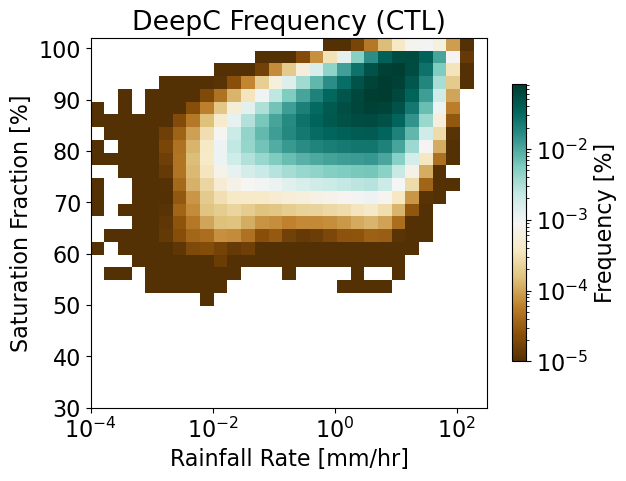

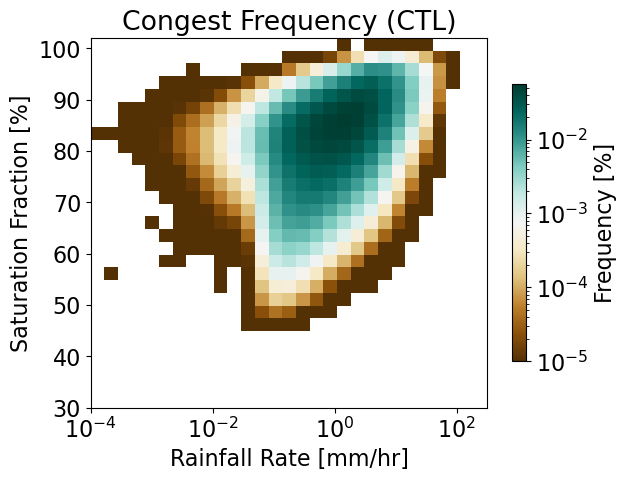

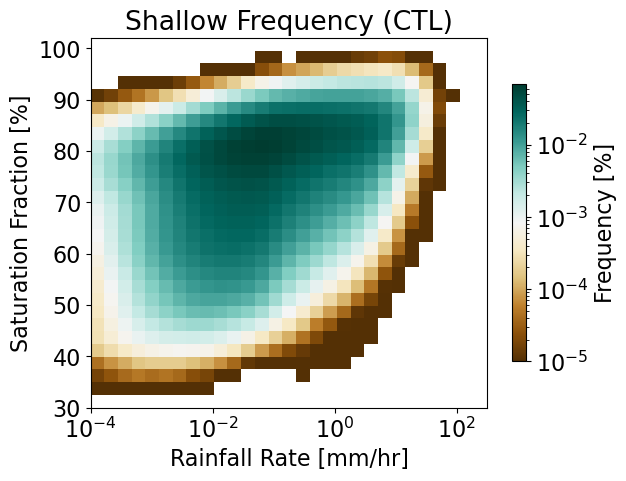

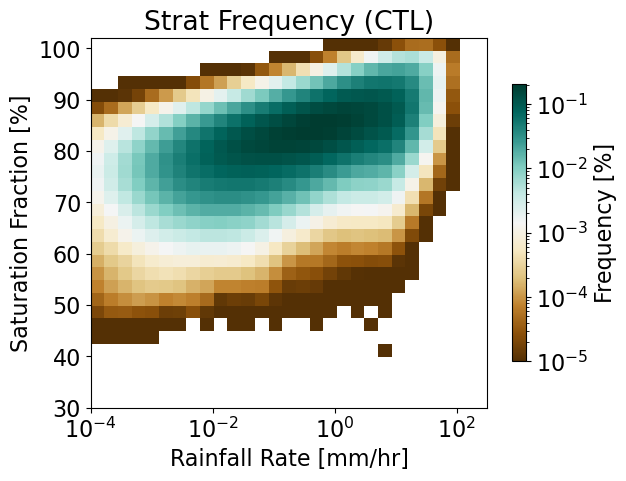

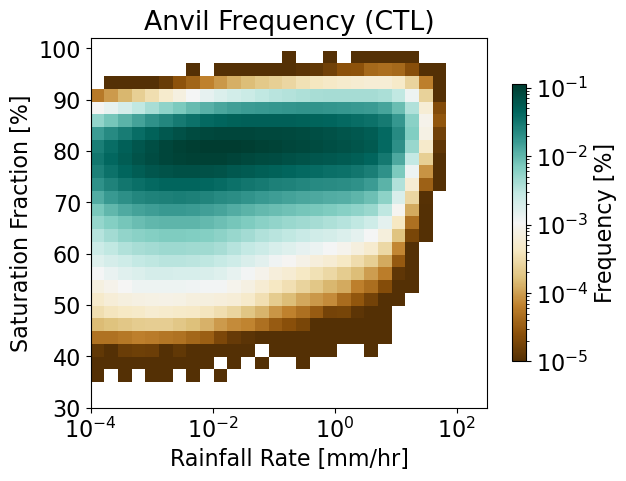

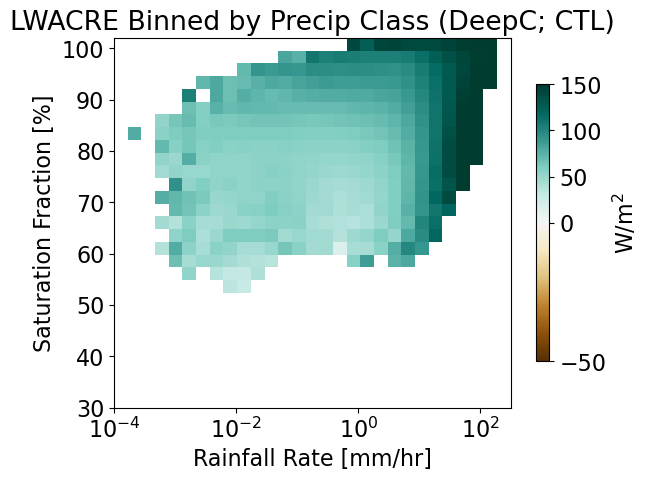

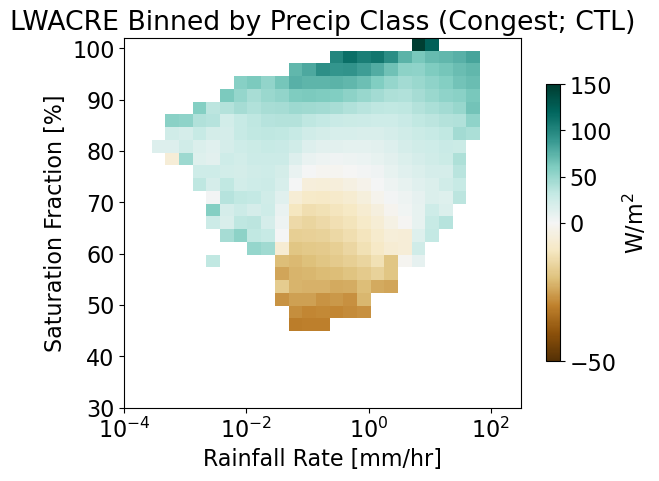

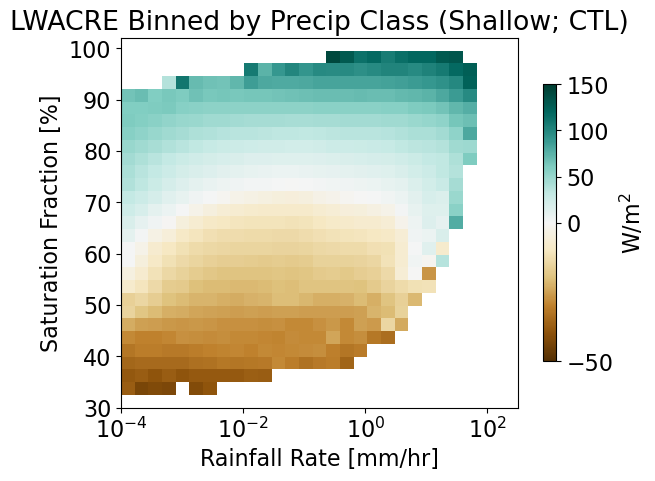

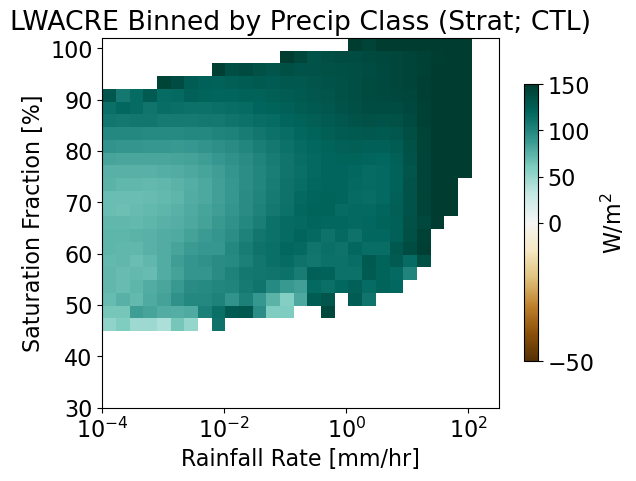

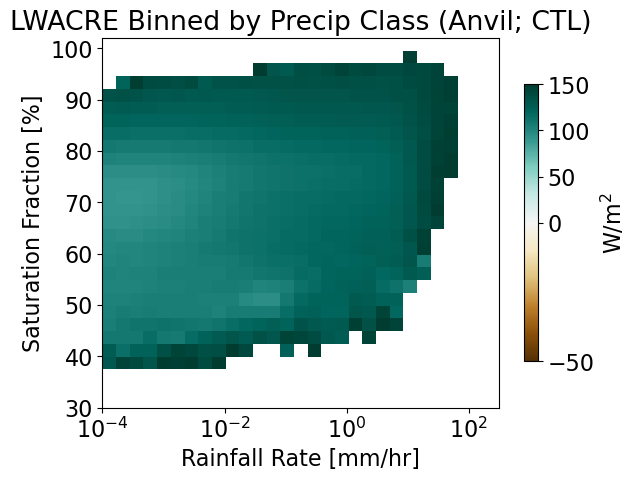

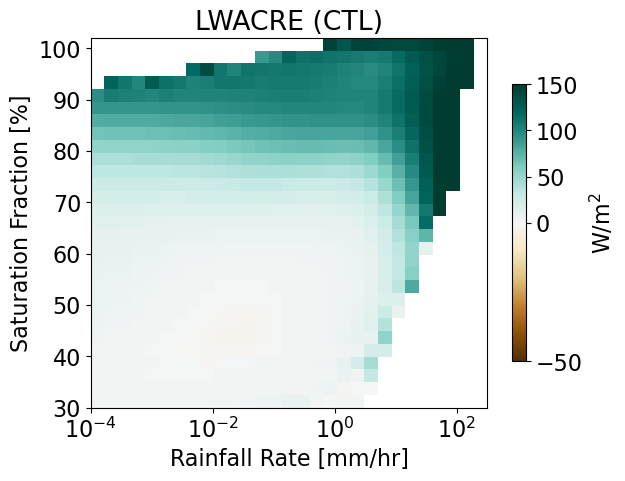

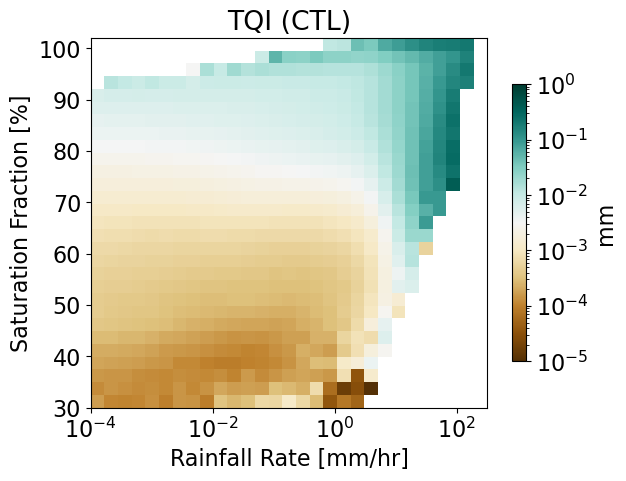

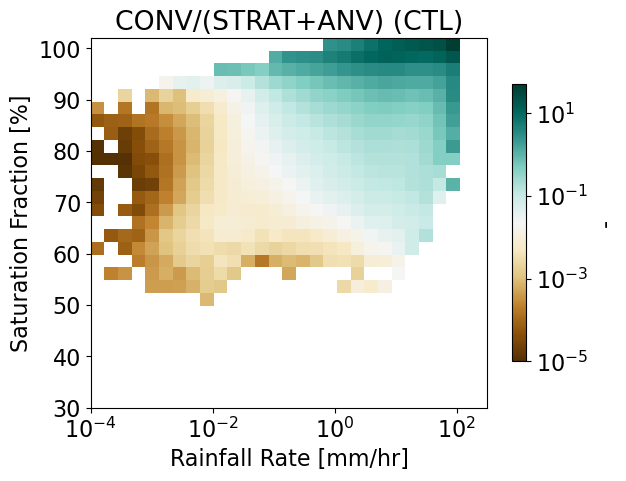

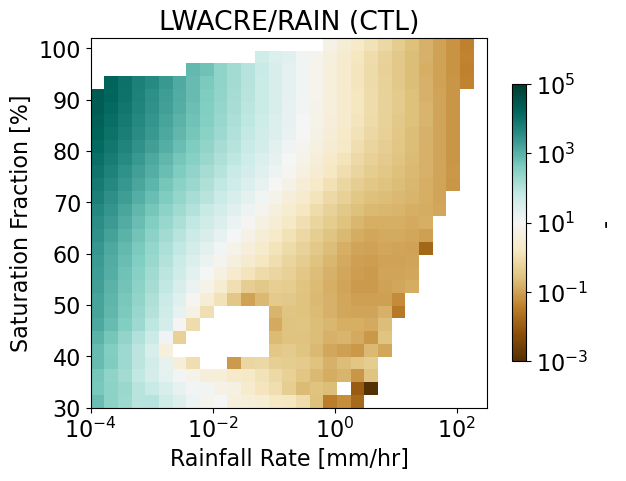

In [33]:
# Select variable (2D; independent var)
# ivar_select = 'strat_area' # Don't think this will work

# ivars=['sf', 'pw', 'rain', 'lwacre']
# ivars=['sf']

# for ivar_select in ivars:

# print("Running for ",ivar_select)
# print()

ivar_select_x='rain'
ivar_select_y='sf'

bins_x, bin_axis_x, xlabel, log_x = binvar_settings(ivar_select_x)
bins_y, bin_axis_y, ylabel, log_y = binvar_settings(ivar_select_y)

save_file=save_dir+ivar_select_x+'-'+ivar_select_y+'.pkl'
binned_vars = read_pickle(save_file)

# Variables binned by precip class

plot_pclass_area(bins_x, bins_y, binned_vars['pclass_area'], pclass_names, tests, xlabel, ylabel,
                 log_x, log_y, dolog=True)
# plot_cbinned_var(bins_x, bins_y, binned_vars['pw_class'], 'cwv', 'mm', pclass_names,
#                  ivar_select_x, ivar_select_y, tests, xlabel, ylabel, log_x, log_y)
print()
plot_cbinned_var(bins_x, bins_y, binned_vars['lwacre_class'], 'lwacre', 'W/m$^2$', pclass_names,
                 ivar_select_x, ivar_select_y, tests, xlabel, ylabel, log_x, log_y,
                 norm=colors.TwoSlopeNorm(0, vmin=-50, vmax=150))
# plot_cbinned_var(bins_x, bins_y, binned_vars['tqi_class']*1e3, 'tqi', 'mm', pclass_names,
#                  ivar_select_x, ivar_select_y, tests, xlabel, ylabel, log_x, log_y, norm=colors.LogNorm(vmin=1e0, vmax=5e2))

print()

# Individual variables bulk-binned

plot_binned_var(bins_x, bins_y, binned_vars['lwacre_binned'], 'lwacre', 'W/m$^2$',
                 ivar_select_x, ivar_select_y, tests, xlabel, ylabel, log_x, log_y,
                 norm=colors.TwoSlopeNorm(0, vmin=-50, vmax=150))
plot_binned_var(bins_x, bins_y, binned_vars['tqi_binned'], 'tqi', 'mm',
                 ivar_select_x, ivar_select_y, tests, xlabel, ylabel, log_x, log_y,# dolog=True)
                 norm=colors.LogNorm(vmin=1e-5, vmax=1e0))
plot_binned_var(bins_x, bins_y, binned_vars['pclass_area'][:,:,1]/(binned_vars['pclass_area'][:,:,4]+binned_vars['pclass_area'][:,:,5]),
                'Conv/(Strat+Anv)', '-', ivar_select_x, ivar_select_y, tests, xlabel, ylabel, log_x, log_y,# dolog=True)
                norm=colors.LogNorm(vmin=1e-5, vmax=5e1))
lv0=2.5e6 # J/kg
plot_binned_var(bins_x, bins_y, binned_vars['lwacre_binned']/(binned_vars['rain_binned']*lv0/(3600*24)),
                'LWACRE/Rain', '-', ivar_select_x, ivar_select_y, tests, xlabel, ylabel, log_x, log_y,# dolog=True)
                norm=colors.LogNorm(vmin=1e-3, vmax=1e5))

# Not using

# plot_cbinned_var(bins, binned_vars['satfrac_class'], 'satfrac', '%', ivar_select, tests, xlabel, log_x)
# plot_cbinned_var(bins, binned_vars['rain_class'], 'rain', 'mm/hr', ivar_select, tests, xlabel, log_x)
# # plot_cbinned_var(bins, binned_vars['vmfd_class'], 'vmfd', 'kg/m/s', ivar_select, tests, xlabel, log_x)
# plot_rain_acre(bins, binned_vars['rain_binned'], binned_vars['lwacre_binned'], ivar_select, tests, xlabel, log_x)

# print()
# print()